# Daten werden eingelesen



In [77]:
import pandas as pd

# Pfad zur xlsx-Datei angeben
dateipfad = r'C:/Users/fabio.kraemer/Desktop/Amicelli/Wichtig/DigitalLab_Tabelle1_010123_300523_1.0.xlsx'

# Daten aus der xlsx-Datei in einen Pandas Dataframe einlesen
dataframe = pd.read_excel(dateipfad)

# Den Inhalt des Dataframes anzeigen
print(dataframe)

                       Time   units   rejected units   
0       2023-01-02T12:12:00       0              NaN  \
1       2023-01-02T12:13:00       0              0.0   
2       2023-01-02T12:14:00       0              0.0   
3       2023-01-02T12:15:00       0              0.0   
4       2023-01-02T12:16:00       0              0.0   
...                     ...     ...              ...   
211026  2023-05-30T12:11:00      15              0.0   
211027  2023-05-30T12:12:00      15              0.0   
211028  2023-05-30T12:13:00      15              0.0   
211029  2023-05-30T12:14:00      15              0.0   
211030  2023-05-30T12:15:00      15              0.0   

                              loss-reason-id      loss-reason + tag(klartext)   
0       b8b90fd3-0c81-4954-9e0f-71ff6fd74c76  Reinigung['geplant'. 'Linie_A']  \
1       b8b90fd3-0c81-4954-9e0f-71ff6fd74c76  Reinigung['geplant'. 'Linie_A']   
2       b8b90fd3-0c81-4954-9e0f-71ff6fd74c76  Reinigung['geplant'. 'Linie_A']   
3  

### Im nächsten Schritt wird eine neue Spalte mit Datum eingefügt, die Wochentage werden ausgegeben und die Zeit in einer einzelnen Spalte dargestellt.

In [78]:
# Neue Spalte "Date" mit dem Datum im gewünschten Format erstellen
dataframe['Date'] = pd.to_datetime(dataframe['Time'], format='%Y-%m-%dT%H:%M:%S').dt.strftime('%d.%m.%Y')

# Spalte "Time" nur mit der Uhrzeit im gewünschten Format aktualisieren
dataframe['Time'] = pd.to_datetime(dataframe['Time'], format='%Y-%m-%dT%H:%M:%S').dt.strftime('%H:%M')

# Neue Spalte "Weekday" mit dem Wochentag basierend auf der Spalte "Date" hinzufügen
dataframe['Weekday'] = pd.to_datetime(dataframe['Date'], format='%d.%m.%Y').dt.day_name()

# Den aktualisierten Dataframe anzeigen
print(dataframe)

         Time   units   rejected units                        loss-reason-id   
0       12:12       0              NaN  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76  \
1       12:13       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
2       12:14       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
3       12:15       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
4       12:16       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
...       ...     ...              ...                                   ...   
211026  12:11      15              0.0                                   NaN   
211027  12:12      15              0.0                                   NaN   
211028  12:13      15              0.0                                   NaN   
211029  12:14      15              0.0                                   NaN   
211030  12:15      15              0.0                                   NaN   

            loss-reason + tag(klartext)

### Als nächstes sollen die Einträge nach Schichten kategorisiert werden.

In [79]:
# Neue Spalte "Schicht" basierend auf der Spalte "Time" hinzufügen
dataframe['Schicht'] = pd.cut(pd.to_datetime(dataframe['Time'], format='%H:%M').dt.hour,
                              bins=[0, 6, 14, 22, 24],
                              labels=['Nachtschicht', 'Frühschicht', 'Spätschicht', 'Nachtschicht'],
                              right=False,
                              ordered=False)

## Nun soll noch eine Spalte mit der Summe aller Touch-Events hinzugefügt werden.

In [80]:
# Liste aller Spalten, die den Begriff "touch-events" im Spaltennamen enthalten
touch_event_columns = [col for col in dataframe.columns if 'touch-events' in col]

# Aufsummierte Werte der touch-event Spalten
dataframe['Touch-Events'] = dataframe[touch_event_columns].sum(axis=1)
print(dataframe)

         Time   units   rejected units                        loss-reason-id   
0       12:12       0              NaN  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76  \
1       12:13       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
2       12:14       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
3       12:15       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
4       12:16       0              0.0  b8b90fd3-0c81-4954-9e0f-71ff6fd74c76   
...       ...     ...              ...                                   ...   
211026  12:11      15              0.0                                   NaN   
211027  12:12      15              0.0                                   NaN   
211028  12:13      15              0.0                                   NaN   
211029  12:14      15              0.0                                   NaN   
211030  12:15      15              0.0                                   NaN   

            loss-reason + tag(klartext)

## Im Dataframe soll zwischen geplanten und ungeplanten Touches differenziert werden können.

In [81]:
dataframe['(un)planned'] = 'none'
dataframe[' loss-reason + tag(klartext)'] = dataframe[' loss-reason + tag(klartext)'].fillna('')
dataframe.loc[dataframe[' loss-reason + tag(klartext)'].str.contains('geplant', case=False), '(un)planned'] = 'geplant'
dataframe.loc[dataframe[' loss-reason + tag(klartext)'].str.contains('ungeplant', case=False), '(un)planned'] = 'ungeplant'

In [82]:
sum_ungeplant = dataframe.loc[dataframe['(un)planned'] == 'ungeplant', 'Touch-Events'].sum()
print("Summe ungeplanter Touch-Events:", sum_ungeplant)

Summe ungeplanter Touch-Events: 283.0


# Einfache beschreibende Grafiken

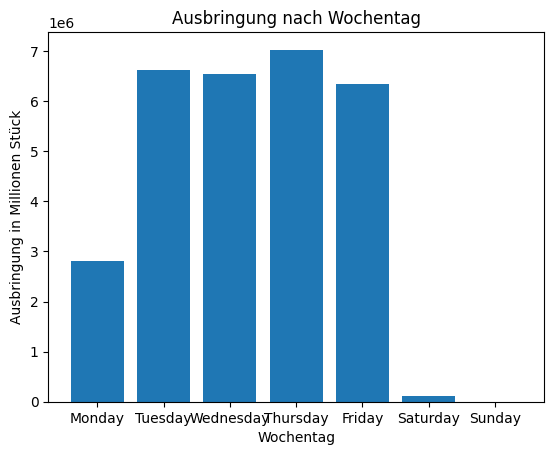

Weekday
Monday       2806008
Tuesday      6620317
Wednesday    6540915
Thursday     7027117
Friday       6348480
Saturday      105960
Sunday             0
Name:  units, dtype: int64


In [83]:
import matplotlib.pyplot as plt
# Definition der Reihenfolge der Wochentage
wochentage = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Gruppierung des Dataframes nach Wochentag und Aggregation der Ausbringung
grouped_data = dataframe.groupby('Weekday')[' units'].sum()

# Anpassung der Indexreihenfolge entsprechend der gewünschten Reihenfolge der Wochentage
grouped_data = grouped_data.reindex(wochentage)

# Erstellen des Diagramms
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Wochentag')
plt.ylabel('Ausbringung in Millionen Stück')
plt.title('Ausbringung nach Wochentag')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

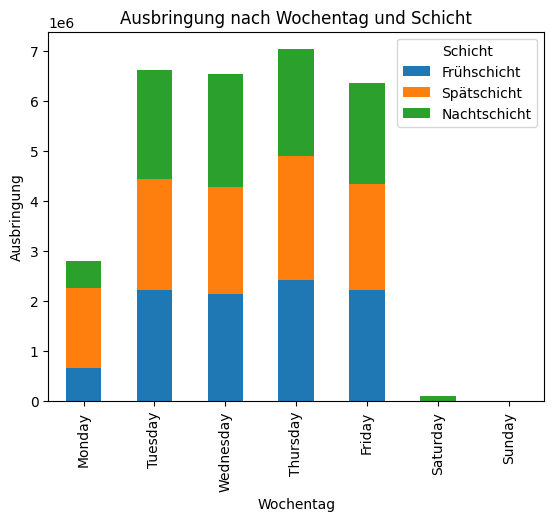

Weekday    Schicht     
Friday     Frühschicht     2214330
           Nachtschicht    2013651
           Spätschicht     2120499
Monday     Frühschicht      658260
           Nachtschicht     544865
           Spätschicht     1602883
Saturday   Frühschicht           0
           Nachtschicht     105960
           Spätschicht           0
Sunday     Frühschicht           0
           Nachtschicht          0
           Spätschicht           0
Thursday   Frühschicht     2427894
           Nachtschicht    2133120
           Spätschicht     2466103
Tuesday    Frühschicht     2225004
           Nachtschicht    2191087
           Spätschicht     2204226
Wednesday  Frühschicht     2142832
           Nachtschicht    2267185
           Spätschicht     2130898
Name:  units, dtype: int64


In [84]:
wochentage = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definition der Reihenfolge der Schichten
schichten = ['Frühschicht', 'Spätschicht', 'Nachtschicht']

# Gruppierung des Dataframes nach Wochentag und Schicht und Aggregation der Ausbringung
grouped_data = dataframe.groupby(['Weekday', 'Schicht'])[' units'].sum()

# Umformung des gruppierten Dataframes für die Darstellung im Diagramm
pivot_data = grouped_data.unstack(level='Schicht')
pivot_data = pivot_data.reindex(wochentage)
pivot_data = pivot_data.reindex(columns=schichten)

# Erstellen des gestapelten Balkendiagramms
pivot_data.plot(kind='bar', stacked=True)

# Anpassung der Diagramm-Achsenbeschriftungen und Titel
plt.xlabel('Wochentag')
plt.ylabel('Ausbringung')
plt.title('Ausbringung nach Wochentag und Schicht')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

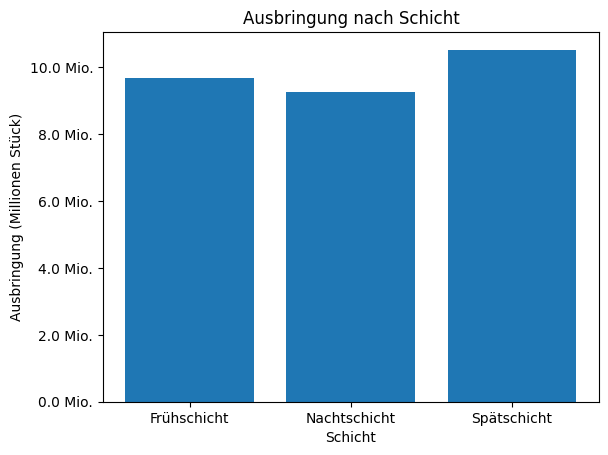

Schicht
Frühschicht      9668320
Nachtschicht     9255868
Spätschicht     10524609
Name:  units, dtype: int64


In [85]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Gruppierung des Dataframes nach Schicht und Aggregation der Ausbringung
grouped_data = dataframe.groupby('Schicht')[' units'].sum()

# Funktion zur Formatierung des y-Achsenticks in Millionen Stück
def millions_formatter(x, pos):
    return f'{x/1e6:.1f} Mio.'

# Erstellen des Diagramms
fig, ax = plt.subplots()
ax.bar(grouped_data.index, grouped_data.values)
ax.set_xlabel('Schicht')
ax.set_ylabel('Ausbringung (Millionen Stück)')
ax.set_title('Ausbringung nach Schicht')

# Anpassung der y-Achsenticks
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Anzeige des Diagramms
plt.show()
print(grouped_data)

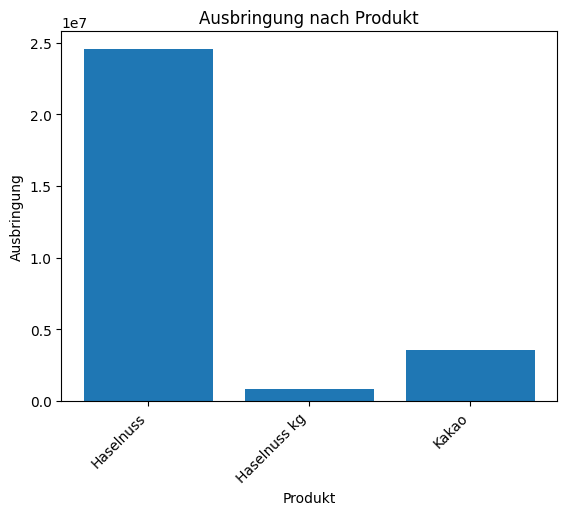

In [86]:
# Gruppierung des Dataframes nach "product (Klartext)" und Aggregation der Aufbringung
grouped_data = dataframe.groupby(' product(Klartext)')[' units'].sum()

# Erstellen des Diagramms
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Produkt')
plt.ylabel('Ausbringung')
plt.title('Ausbringung nach Produkt')

# Anpassung der x-Achse für bessere Lesbarkeit
plt.xticks(rotation=45, ha='right')

# Anzeige des Diagramms
plt.show()

# Statistische Auswertung

In [87]:
# Ermittlung der Anzahl der Touch-Events
touch_events_columns = [col for col in dataframe.columns if 'touch-events' in col]
total_touch_events = dataframe[touch_events_columns].sum().sum()

# Ermittlung der Anzahl der Datenfelder
total_columns = len(dataframe.columns)

# Ermittlung der Anzahl der Zeilen
total_rows = len(dataframe)

# Summe der Ausbringung
total_units = dataframe[' units'].sum()

# Summe des Ausschusses
total_rejected_units = dataframe[' rejected units'].sum()

# Erstellen der Tabelle
summary_table = pd.DataFrame({
    'Anzahl der Touch-Events': [total_touch_events],
    'Anzahl der Datenfelder': [total_columns],
    'Anzahl der Zeilen': [total_rows],
    'Summe der Gutmenge': [total_units],
    'Summe des Ausschusses': [total_rejected_units]
})

# Anzeige der Tabelle
print(summary_table)

   Anzahl der Touch-Events  Anzahl der Datenfelder  Anzahl der Zeilen   
0                  63959.0                      40             211031  \

   Summe der Gutmenge  Summe des Ausschusses  
0            29448797              1980128.0  


 Ofen10 Menge 34388184
 Ofen11 Menge 29935124
 Ofen12 Menge 34016998


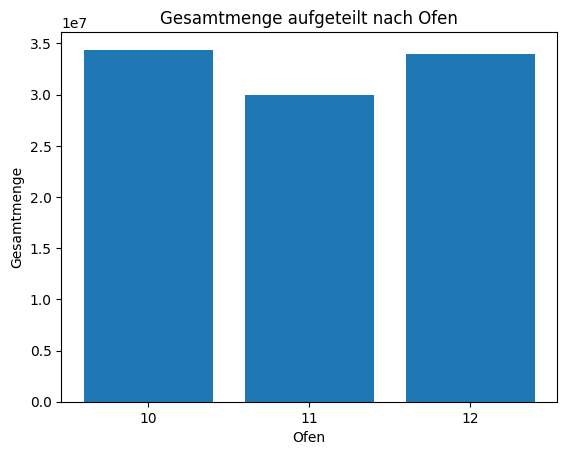

In [88]:
# Überprüfung der Daten für jedes Ofen-Menge-Paar
for col in dataframe.columns:
    if ' Ofen' in col and 'Menge' in col:
        print(col, dataframe[col].sum())

# Extrahiere die Ofennummern aus den Spaltennamen
ofen_numbers = [col.split()[0][-2:] for col in dataframe.columns if ' Ofen' in col and 'Menge' in col]

# Summiere die Menge für jeden Ofen
gesamtmenge = [dataframe[f' Ofen{ofen} Menge'].sum() for ofen in ofen_numbers]

# Erstellen des Diagramms
plt.bar(ofen_numbers, gesamtmenge)
plt.xlabel('Ofen')
plt.ylabel('Gesamtmenge')
plt.title('Gesamtmenge aufgeteilt nach Ofen')

# Anzeige des Diagramms
plt.show()

# Touches
## Touches nach Wochentagen

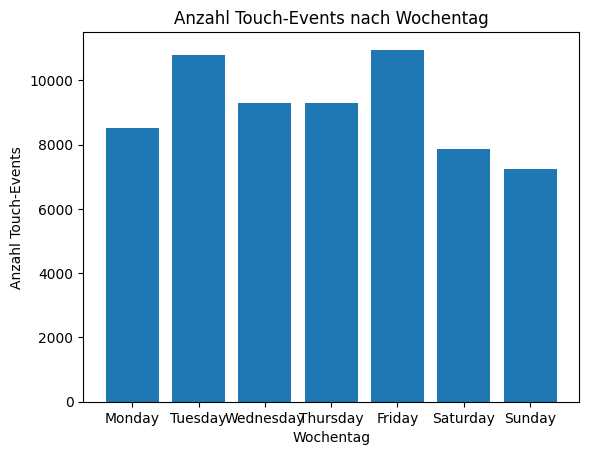

Weekday
Monday        8519.0
Tuesday      10801.0
Wednesday     9297.0
Thursday      9302.0
Friday       10952.0
Saturday      7858.0
Sunday        7230.0
Name: Touch-Events, dtype: float64


In [89]:
# Definition der Reihenfolge der Wochentage in englischer Sprache
wochentage = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Gruppierung des Dataframes nach Wochentag und Aggregation der Touch-Events
grouped_data = dataframe.groupby('Weekday')['Touch-Events'].sum()
# Anpassung der Indexreihenfolge entsprechend der gewünschten Reihenfolge der Wochentage
grouped_data = grouped_data.reindex(wochentage)
# Erstellen des Diagramms
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl Touch-Events')
plt.title('Anzahl Touch-Events nach Wochentag')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

## Touches nach Schichten

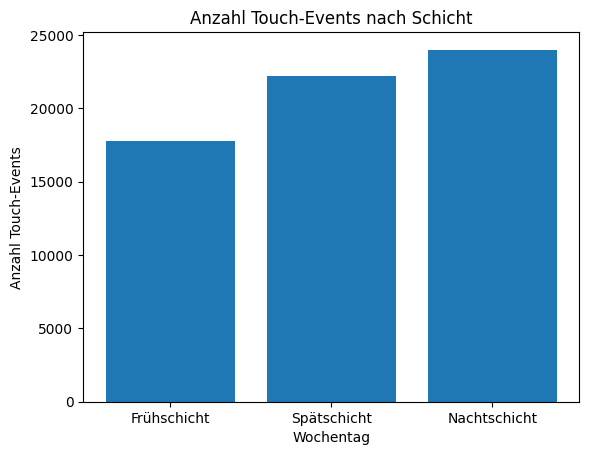

Schicht
Frühschicht     17791.0
Spätschicht     22175.0
Nachtschicht    23993.0
Name: Touch-Events, dtype: float64


In [90]:
# Definition der Reihenfolge der Wochentage in englischer Sprache
schichten = ['Frühschicht', 'Spätschicht', 'Nachtschicht']
# Gruppierung des Dataframes nach Wochentag und Aggregation der Touch-Events
grouped_data = dataframe.groupby('Schicht')['Touch-Events'].sum()
# Anpassung der Indexreihenfolge entsprechend der gewünschten Reihenfolge der Wochentage
grouped_data = grouped_data.reindex(schichten)
# Erstellen des Diagramms
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl Touch-Events')
plt.title('Anzahl Touch-Events nach Schicht')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

## Differenzierung Touch-Events

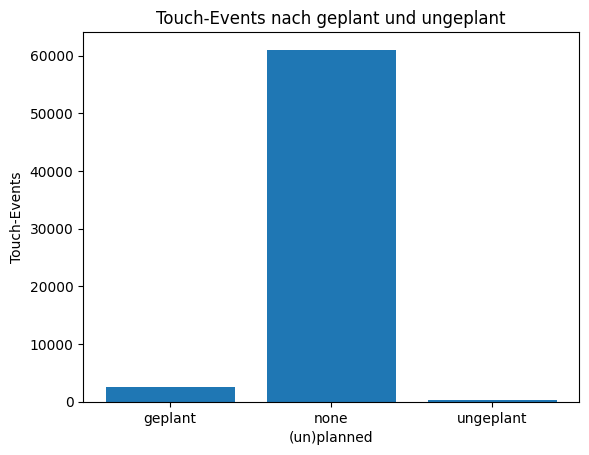

(un)planned
geplant       2639.0
none         61037.0
ungeplant      283.0
Name: Touch-Events, dtype: float64


In [91]:
# Gruppierung des Dataframes nach (un)planned und Aggregation der Touch-Events
grouped_data = dataframe.groupby('(un)planned')['Touch-Events'].sum()

# Erstellen des Balkendiagramms
plt.bar(grouped_data.index.astype(str), grouped_data.values)
plt.xlabel('(un)planned')
plt.ylabel('Touch-Events')
plt.title('Touch-Events nach geplant und ungeplant')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

##### Einige Touch-Events haben zwar IDs, aber leider keinen passenden Tag. Dabei handelt es sich um den Großteil der Touch-Events.
# Verteilung der auswertbaren Touch-Events nach Schichten

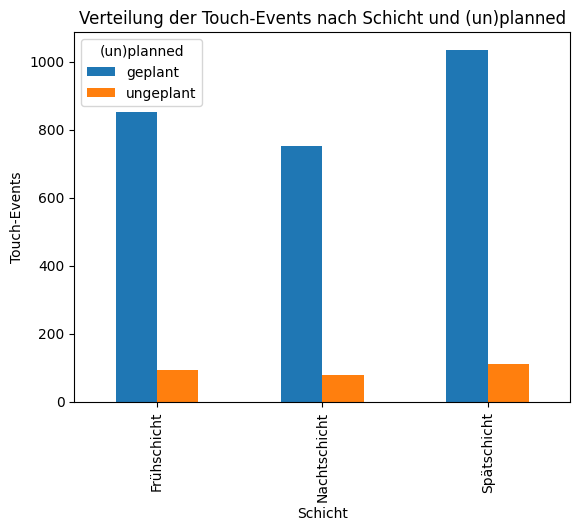

(un)planned   geplant  ungeplant
Schicht                         
Frühschicht     851.0       93.0
Nachtschicht    753.0       79.0
Spätschicht    1035.0      111.0


In [95]:
# Filtern der Daten, um den Wert "none" auszuschließen
filtered_data = dataframe[dataframe['(un)planned'] != 'none']

# Gruppierung des gefilterten Dataframes nach Schicht und (un)planned, Zählung der Touch-Events
grouped_data = filtered_data.groupby(['Schicht', '(un)planned'])['Touch-Events'].sum()

# Umformatierung der Daten für das Balkendiagramm
grouped_data = grouped_data.unstack()

# Erstellen des Balkendiagramms
grouped_data.plot(kind='bar', stacked=False)

plt.xlabel('Schicht')
plt.ylabel('Touch-Events')
plt.title('Verteilung der Touch-Events nach Schicht und (un)planned')

# Anzeige des Diagramms
plt.show()
print(grouped_data)

## Verteilung der auswertbaren Touches nach Wochentagen

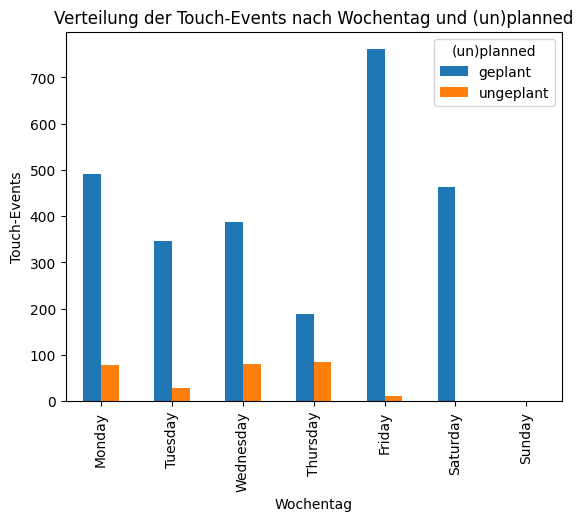

(un)planned  geplant  ungeplant
Weekday                        
Monday         491.0       78.0
Tuesday        347.0       28.0
Wednesday      388.0       80.0
Thursday       188.0       85.0
Friday         761.0       12.0
Saturday       464.0        0.0
Sunday           NaN        NaN


In [105]:
# Filtern der Daten, um den Wert "none" auszuschließen
filtered_data = dataframe[dataframe['(un)planned'] != 'none']

# Gruppierung des gefilterten Dataframes nach Wochentag und (un)planned, Zählung der Touch-Events
grouped_data = filtered_data.groupby(['Weekday', '(un)planned'])['Touch-Events'].sum()

# Umformatierung der Daten für das Balkendiagramm
grouped_data = grouped_data.unstack(fill_value=0)

# Sortieren der Wochentage in der richtigen Reihenfolge
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data = grouped_data.reindex(weekday_order)

# Erstellen des Balkendiagramms
grouped_data.plot(kind='bar', stacked=False)

plt.xlabel('Wochentag')
plt.ylabel('Touch-Events')
plt.title('Verteilung der Touch-Events nach Wochentag und (un)planned')

# Anzeige des Diagramms
plt.show()
print(grouped_data)